In [1]:
import pandas as pd
import numpy as np

## 1. 两种数据类型

- DataFrame

    - 行索引，表明不同行，横向索引，叫index
    - 列索引，表名不同列，纵向索引，叫columns
    - 可以理解为多个Series数据类型的集合
    
- Series

    - 只有行索引

#### 1.1DataFrame的基本操作

**创建一个数据:**

- 创建该类型的数据,可以直接创建,也可以将其他的数据转换为该格式数据
- DataFrame(data=[],index=[],coloumns=[])


In [2]:
# 创建股票数据,3支股票5天的涨跌情况
stock_change = np.random.normal(0, 1, (3, 5))
stock_change

array([[-0.53462333,  1.20288821,  0.12961082, -0.7214095 ,  0.31290986],
       [-2.09659504,  0.09367255, -0.40167508,  1.50175836, -0.52161035],
       [-0.50354144, -1.12215943, -0.43768928,  0.76323896,  0.39882337]])

**创建方式1: 将numpy的array数据类型转换为 DataFrame 格式数据类型**

In [3]:
stock_change = pd.DataFrame(stock_change)
stock_change

,0,1,2,3,4
0,-0.534623,1.202888,0.129611,-0.721409,0.312910
1,-2.096595,0.093673,-0.401675,1.501758,-0.521610
2,-0.503541,-1.122159,-0.437689,0.763239,0.398823


**创建方式2: 手动创建DataFrame的数据类型**

In [23]:
df = pd.DataFrame({
    'names': ['tony', 'jim', 'tom'],
    'ages': [12, 13, 11],
    'scores': [90, 85, 95]
})

df

,names,ages,scores
0,tony,12,90
1,jim,13,85
2,tom,11,95


In [28]:
## 设置多个索引或者单个索引
df.set_index(['names', 'ages'])
# 这样DataFrame就变成了一个具有MultiIndex的DataFrame。

,,scores
names,ages,
tony,12,90
jim,13,85
tom,11,95


**查看DataFrame数据的一些属性**

In [5]:
stock_change.shape  # 查看形状

(3, 5)

In [7]:
stock_change.index  # 查看行索引列表

RangeIndex(start=0, stop=3, step=1)

In [8]:
stock_change.columns  # 查看列索引列表

RangeIndex(start=0, stop=5, step=1)

In [10]:
stock_change.values  # 查看其中的值,也就是numpy的array数据类型

array([[-0.53462333,  1.20288821,  0.12961082, -0.7214095 ,  0.31290986],
       [-2.09659504,  0.09367255, -0.40167508,  1.50175836, -0.52161035],
       [-0.50354144, -1.12215943, -0.43768928,  0.76323896,  0.39882337]])

In [11]:
stock_change.T  # 查看其转置

,0,1,2
0,-0.534623,-2.096595,-0.503541
1,1.202888,0.093673,-1.122159
2,0.129611,-0.401675,-0.437689
3,-0.721409,1.501758,0.763239
4,0.312910,-0.521610,0.398823


**DataFrame一些常用的方法**

In [14]:
stock_change.head(2)  # 显示前2行的数据

,0,1,2,3,4
0,-0.534623,1.202888,0.129611,-0.721409,0.31291
1,-2.096595,0.093673,-0.401675,1.501758,-0.52161


In [15]:
stock_change.tail(2)  # 显示后2行的数据

,0,1,2,3,4
1,-2.096595,0.093673,-0.401675,1.501758,-0.521610
2,-0.503541,-1.122159,-0.437689,0.763239,0.398823


#### 1.2 Series的基本操作

- 只有行索引,没有列索引

**创建方式1: 指定内容,默认索引**

In [29]:
pd.Series(np.arange(6))

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int32

**创建方式2: 指定内容,指定索引**

In [30]:
pd.Series([80, 90, 85], index=['tony', 'jim', 'tom'])

tony    80
jim     90
tom     85
dtype: int64

**创建方式3:通过字典方式创建**

In [32]:
pds1 = pd.Series({
    'red': 100,
    'green': 200,
    'yellow': 300
})

pds1

red       100
green     200
yellow    300
dtype: int64

**Series的相关属性**

In [35]:
pds1.index  # 查看数据索引

Index(['red', 'green', 'yellow'], dtype='object')

In [36]:
pds1.values  # 查看数据的值

array([100, 200, 300], dtype=int64)

## 2. 基本数据操作

#### 2.1读取csv文件

In [38]:
sp_file = pd.read_csv('./data/StudentsPerformance.csv')
sp_file

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**删除部分不需要的列**

In [40]:
sp_file.drop(['parental level of education', 'lunch'], axis=1)

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
0,female,group B,none,72,72,74
1,female,group C,completed,69,90,88
2,female,group B,none,90,95,93
3,male,group A,none,47,57,44
4,male,group C,none,76,78,75
5,female,group B,none,71,83,78
6,female,group B,completed,88,95,92
7,male,group B,none,40,43,39
8,male,group D,completed,64,64,67
9,female,group B,none,38,60,50


#### 2.2 索引操作

- 直接使用行列索引(先列后行)

In [57]:
print('sp_file type: ', type(sp_file))  # 注意从csv文件中读取到的数据就是DataFrame格式的

sp = pd.DataFrame(sp_file)
sp.set_index('gender')

print('sp type: ', type(sp))

sp_file['math score'][0]  # 获得第0位的数学成绩

sp_file type:  <class 'pandas.core.frame.DataFrame'>
sp type:  <class 'pandas.core.frame.DataFrame'>


72

**结合loc和iloc来使用索引**

In [60]:
# 获取前[0, 10]位的所有成绩

sp10 = sp.loc[0:10, ['math score', 'reading score', 'writing score']]
sp10

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


#### 2.3 赋值操作

In [64]:
sp10['writing score'] = 0  # 将此列的数据全部赋值为0, 或者 sp10.writing_score=0(前提是为writing_score)s
sp10

,math score,reading score,writing score
0,72,72,0
1,69,90,0
2,90,95,0
3,47,57,0
4,76,78,0
5,71,83,0
6,88,95,0
7,40,43,0
8,64,64,0
9,38,60,0


#### 2.4 排序

- 内容排序
    
    对于DataFrame: 
    
        df.sort_values(key=,ascending=)

        - 单个键或者多个键进行排序,默认升序
        - ascending=False:降序
        - ascending=True:升序

    对于Series:
    
        series.sort_values(ascending=True)

        - series排序时，只有一列，不需要参数
    
- 索引排序

    对于DataFrame以及Series: 
    
    df.sort_index()
    
    series.sort_index()

In [67]:
sp10.sort_values('math score', ascending=False)  # 按照数学成绩降序

,math score,reading score,writing score
2,90,95,0
6,88,95,0
4,76,78,0
0,72,72,0
5,71,83,0
1,69,90,0
8,64,64,0
10,58,54,0
3,47,57,0
7,40,43,0


## 3. DataFrame运算

#### 3.1 算术运算

- add(), 加
- sub(), 减

In [96]:
df = pd.DataFrame({
    'names': ['tony', 'tom', 'jim', 'anna', 'jenny'],
    'ages': [12, 13, 14, 13, 15],
    'scores': [90, 95, 85, 75, 90]
})

print('df: \n', df)

print('add(): \n', df['scores'].add(5))  # 将某一列的数据全部加5,得到的是该列变化之后的数

print('sub(): \n', df['scores'].sub(5))  # 将某一列的数据全部减5,注意此处不收上一行的加5影响

df: 
    names  ages  scores
0   tony    12      90
1    tom    13      95
2    jim    14      85
3   anna    13      75
4  jenny    15      90
add(): 
 0     95
1    100
2     90
3     80
4     95
Name: scores, dtype: int64
sub(): 
 0    85
1    90
2    80
3    70
4    85
Name: scores, dtype: int64


#### 3.2 逻辑运算

- '>', 大于
- '<', 小于
- '|', 或
- '&', 与

In [97]:
df[(df['ages'] > 12) & (df['scores'] < 90)]  # 找到年龄大于20, 成绩低于90的人

,names,ages,scores
2,jim,14,85
3,anna,13,75


#### 3.3 统计运算

统计函数:

- sum	Sum of values
- mean	Mean of values
- median	Arithmetic median of values
- min	Minimum
- max	Maximum
- mode	Mode
- abs	Absolute Value
- prod	Product of values
- std	Bessel-corrected sample standard deviation
- var	Unbiased variance
- idxmax	compute the index labels with the maximum
- idxmin	compute the index labels with the minimum


累计统计函数:

- cumsum	计算前1/2/3/…/n个数的和
- cummax	计算前1/2/3/…/n个数的最大值
- cummin	计算前1/2/3/…/n个数的最小值
- cumprod	计算前1/2/3/…/n个数的积

In [100]:
df.describe()  # 综合分析, 一次输出多种信息

,ages,scores
count,5.000000,5.000000
mean,13.400000,87.000000
std,1.140175,7.582875
min,12.000000,75.000000
25%,13.000000,85.000000
50%,13.000000,90.000000
75%,14.000000,90.000000
max,15.000000,95.000000


In [102]:
df.max(0)  # 0代表列求结果, 1表示行求结果

names     tony
ages        15
scores      95
dtype: object

In [105]:
df.std(0) # 标准差

ages      1.140175
scores    7.582875
dtype: float64

In [110]:
df.var(0)  # 方差

ages       1.3
scores    57.5
dtype: float64

## 4. pandas画图

**pandas.DataFrame.plot(x=None, y=None, kind='line')**

- x
- y
- kind
    - ‘line’ : line plot (default)
    - ‘bar’ : vertical bar plot
    - ‘barh’ : horizontal bar plot
    - ‘hist’ : histogram
    - ‘pie’ : pie plot
    - ‘scatter’ : scatter plot

## 5. 文件读取和存储

```text
format    reader       writer
json      read_json    to_json
csv       read_csv     to_csv
hdf5      read_hdf     to_hdf
excel     read_excel   to_excel      (binary)
```

- pandas.read_csv(filepath_or_buffer, sep =',' , delimiter = None)
    - filepath_or_buffer:文件路径
    - usecols:指定读取的列名，列表形式
    
- DataFrame.to_csv(path_or_buf=None, sep=', ’, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None)
    - path_or_buf :string or file handle, default None
    - sep :character, default ‘,’
    - columns :sequence, optional
    - mode:'w'：重写, 'a' 追加
    - index:是否写进行索引
    - header :boolean or list of string, default True,是否写进列索引值
 
- Series.to_csv(path=None, index=True, sep=', ', na_rep='', float_format=None, header=False, index_label=None, mode='w', encoding=None, compression=None, date_format=None, decimal='.')

In [2]:
import pandas as pd

# 读取csv格式的文件,并指定需要显式的列
sp = pd.read_csv('./data/StudentsPerformance.csv', usecols=['gender', 'math score'])
sp

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76
5,female,71
6,female,88
7,male,40
8,male,64
9,female,38


In [26]:
# 写入到csv格式的文件
df = pd.DataFrame({
    'names': ['tony', 'tom', 'jim', 'anna', 'jenny'],
    'ages': [12, 13, 14, 13, 15],
    'scores': [90, 95, 85, 75, 90]
})
df.to_csv('./data/pd_scores.csv')

## 6. 缺失值处理

- pd.isnull(df): 判断数据是否为NaN
- pd.notnull(df): 判断数据是否为NaN
- pd.fillna(value, inplace=True): 替换缺失值为 value, inplace=True会修改原始数据, False不会修改原始数据

**处理方式:**
1. df.dropna(), 删除缺失值
2. df['score'].fillna(value, inplace=True), 替换缺失值

**非pd.NaN, 但是又不是正常数据的处理:**
1. 将其替换为pd.NaN
2. 对pd.NaN进行处理

In [25]:
pd.isnull(df)

,names,ages,scores
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


## 7. 数据离散化处理

即将连续属性的值域划分为若干离散的区间, 最后用不同的符号或整数值代表落在每个自区间中的属性值.

**可以简化数据结构, 减少给定连续属性的个数.**

- pd.qcut(data, bins), 根据这些值的频率来选择均匀间隔
    - data: 需要分组的数据,需要时一维的
    - bins: 分组的组数
    
- pd.cut(data, bins), 根据值本身来选择均匀间隔

In [19]:
import pandas as pd
sp = pd.read_csv('./data/StudentsPerformance.csv')  # 读取表格
math_score = sp['math score']  # 去表格中的数学成绩一列
math_score_qcut = pd.qcut(math_score, 10)  # 将数据进行离散化处理
math_score_qcut.value_counts()  # 统计每个组的个数

(53.0, 59.0]      120
(-0.001, 47.0]    107
(62.0, 66.0]      106
(74.0, 79.0]      102
(66.0, 70.0]      102
(79.0, 86.0]       98
(70.0, 74.0]       96
(47.0, 53.0]       96
(86.0, 100.0]      95
(59.0, 62.0]       78
Name: math score, dtype: int64

In [23]:
math_score_cut = pd.cut(math_score, 10)
math_score_cut.value_counts()

(60.0, 70.0]     270
(70.0, 80.0]     215
(50.0, 60.0]     189
(80.0, 90.0]     126
(40.0, 50.0]     100
(90.0, 100.0]     50
(30.0, 40.0]      34
(20.0, 30.0]      12
(10.0, 20.0]       2
(-0.1, 10.0]       2
Name: math score, dtype: int64

**将分组数据进行one-hot编码**

In [24]:
dummies = pd.get_dummies(math_score_cut, prefix='rise')
dummies

,"rise_(-0.1, 10.0]","rise_(10.0, 20.0]","rise_(20.0, 30.0]","rise_(30.0, 40.0]","rise_(40.0, 50.0]","rise_(50.0, 60.0]","rise_(60.0, 70.0]","rise_(70.0, 80.0]","rise_(80.0, 90.0]","rise_(90.0, 100.0]"
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0,0,0


## 8. 合并处理

**合并即将多张表中相同或不相同的内容组合到一起分析**

- pd.concat([data1, data2], axis=1)
    - axis=0表示按照列索引进行合并,axis=1表示按照行索引合并
- pd.merge()

In [28]:
math_score = sp['math score']
pd.concat([math_score, dummies], axis=1)

,math score,"rise_(-0.1, 10.0]","rise_(10.0, 20.0]","rise_(20.0, 30.0]","rise_(30.0, 40.0]","rise_(40.0, 50.0]","rise_(50.0, 60.0]","rise_(60.0, 70.0]","rise_(70.0, 80.0]","rise_(80.0, 90.0]","rise_(90.0, 100.0]"
0,72,0,0,0,0,0,0,0,1,0,0
1,69,0,0,0,0,0,0,1,0,0,0
2,90,0,0,0,0,0,0,0,0,1,0
3,47,0,0,0,0,1,0,0,0,0,0
4,76,0,0,0,0,0,0,0,1,0,0
5,71,0,0,0,0,0,0,0,1,0,0
6,88,0,0,0,0,0,0,0,0,1,0
7,40,0,0,0,1,0,0,0,0,0,0
8,64,0,0,0,0,0,0,1,0,0,0
9,38,0,0,0,1,0,0,0,0,0,0


## 9. 交叉表和透视表

- 交叉表用于计算一列数据对于另一列数据的分组个数(寻找两列之间的关系)

    - pd.crosstab(value1, value2)
    
- 透视表基本等同于交叉表

    - DataFrame.pivot_table([], index=[])

In [1]:
## 利用交叉表来分析数学成绩是否与性别有关
import numpy as np
import pandas as pd

sp = pd.read_csv('./data/StudentsPerformance.csv', usecols = ['math score', 'gender'])
math_score= sp['math score']
gender = sp['gender']

In [2]:
# 使用交叉表
res = pd.crosstab(gender, math_score)
res.T

gender,female,male
math score,,
0,1,0
8,1,0
18,1,0
19,1,0
22,1,0
23,1,0
24,1,0
26,1,0
27,1,1


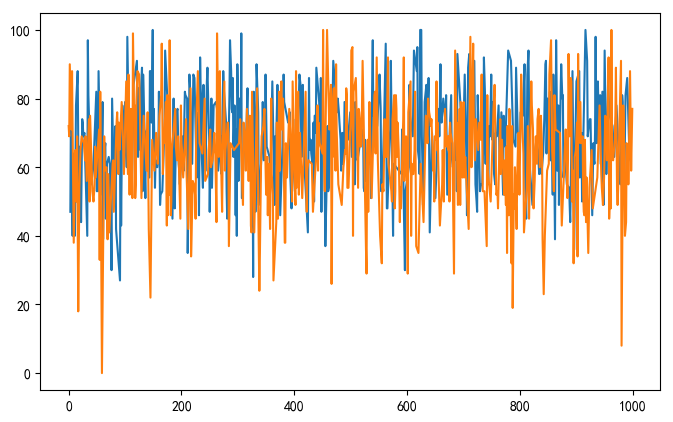

In [10]:
# 通过画图的形式来判断感受是否与性别有关
female_math_score = sp[(sp['gender'] == 'female')]['math score']
male_math_score = sp[(sp['gender'] == 'male')]['math score']

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5), dpi=100)

plt.plot(male_math_score)
plt.plot(female_math_score)

plt.show()

## 10. 分组和聚合

- 通常和一些统计函数一起,查看数据的分组情况
- DataFrame.groupby(key, as_index=False), 分组函数
    - key: 分组的列依据,可多个


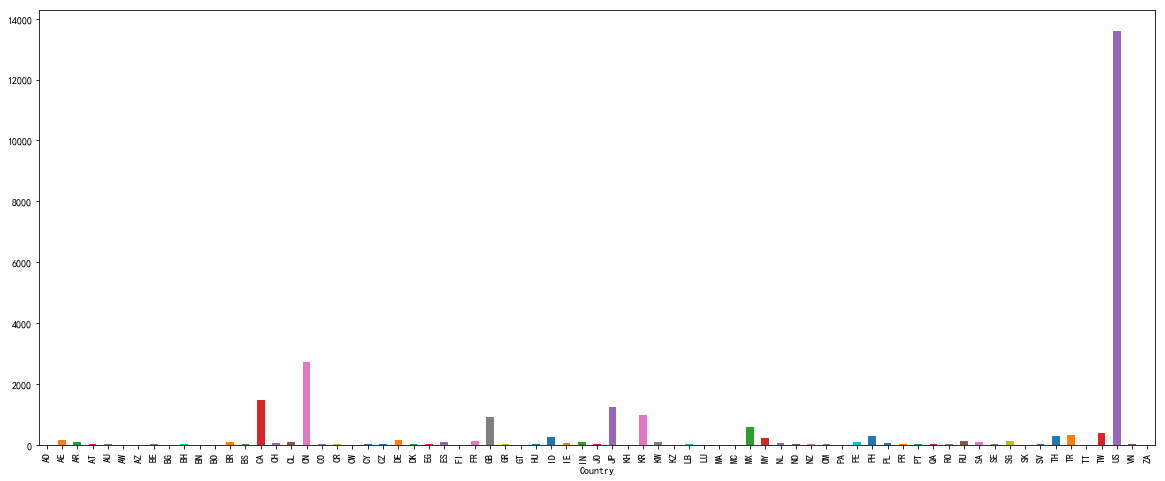

In [22]:
# 统计星巴克在各个国家的位置
star_loc = pd.read_csv('./data/starbucks_location.csv')
count = star_loc.groupby(['Country']).count()

count['Brand'].plot(kind='bar', figsize=(20, 8))
plt.show()

In [24]:
# 依据多个列进行分组
star_loc.groupby(['Country', 'State/Province']).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                   3             3           3               3   
        X                   6             6           6               6   
AT      3                   1             1           1               1   
        5                   3             3           3               3   
        9                  14            14          14              14   
AU      NSW                 9             9           9               9   
        QLD                 8             8           8               8   
        VIC                 5             5           5               5   
AW      AW                  3             3           3               3   
AZ      BA                  3             3           3               3   
        SAB                 1             1           1               1   
BE      BE                  4             4           4               4   
        VAN                 1             1           1               1   
        VBR                 2             2           2               2   
        VLG                10            10          10              10   
        WAL                 2             2           2               2   
BG      2                   1             1           1               1   
        23                  4             4           4               4   
BH      13                 16            16          16              16   
...                       ...           ...         ...             ...   
US      MO                188           188         188             188   
        MS                 32            32          32              32   
        MT                 36            36          36              36   
        NC                338           338         338             338   
        ND                 13            13          13              13   
        NE                 58            58          58              58   
        NH                 29            29          29              29   
        NJ                261           261         261             261   
        NM                 76            76          76              76   
        NV                253           253         253             253   
        NY                645           645         645             645   
        OH                378           378         378             378   
        OK                 79            79          79              79   
        OR                359           359         359             359   
        PA                357           357         357             357   
        RI                 27            27          27              27   
        SC                131           131         131             131   
        SD                 25            25          25              25   
        TN                180           180         180             180   
        TX               1042          1042        1042            1042   
        UT                101           101      

## 11. 综合案例

分析IMDB 2006-2016 之间的1000部电影.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movie = pd.read_csv('./data/imdb_movie.csv')

In [3]:
# 得到评分的平均分
movie['Rating'].mean()

6.723199999999999

In [4]:
# 求出导演的数量
np.unique(movie['Director']).shape[0]

644

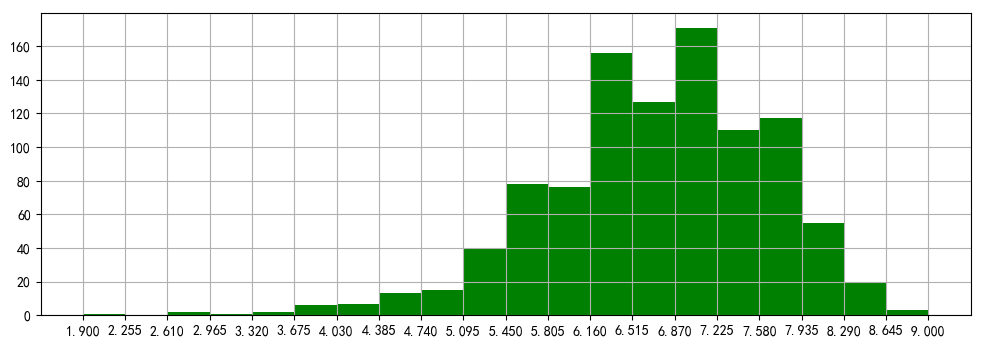

In [9]:
# 查看评分的分布情况
plt.figure(figsize=(12, 4), dpi=100)
plt.hist(movie['Rating'].values, bins=20, color='g')  # 分成20组的间隔展示

# 修改刻度的间隔
max_ = movie['Rating'].max()
min_ = movie['Rating'].min()

# 生成刻度列表
t = np.linspace(min_, max_, num=21)
plt.xticks(t)

# 添加网格
plt.grid()

In [12]:
# 查看电影的分类情况
# 创建一个全为0的DF,列索引设置为电影分类

temp_list = [i.split(',') for i in movie['Genre']]  # 字符串分割
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [15]:
# 获取电影的分类,将多重的分类分开为单独的
genre_list = np.unique([i for j in temp_list for i in j])
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [21]:
# 增加新的全0列, 行为电影数量, 列为电影的种类
temp_df = pd.DataFrame(np.zeros((movie.shape[0], genre_list.shape[0])), columns=genre_list)
temp_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# 遍历每一部电影,将在temp_df中把出现的分类置为1
for i in range(1000):
    temp_df.loc[i, temp_list[i]] = 1

temp_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
temp_df.sum().sort_values()  # 统计不同的种类的数量并按序输出

Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64

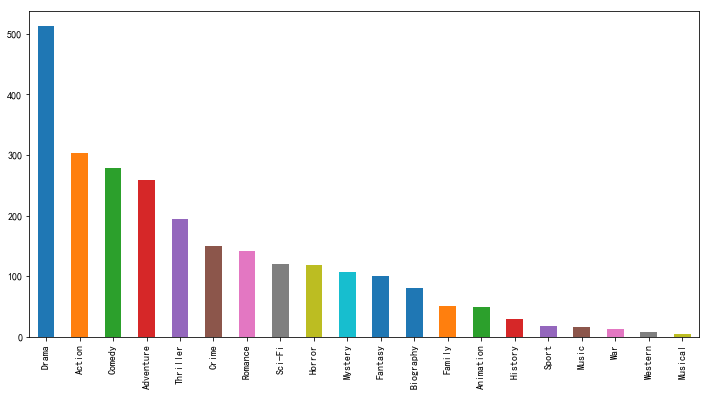

In [28]:
# 降序输出表格
temp_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))